# Data Engineer Salaries (2.17.3) - Problem
Matplotlib Histograms
Problem Statement:
Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
Customize the plot by setting the number of bins to 50, the bar color to red
Add annotations for the mean and median salaries, using plt.axvline(); for the parameters specify:
color: 'blue'/'green'
linestyle: 'dashed'
label: e.g., f'Mean: ${mean_salary:,.0f}'
Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pedro\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


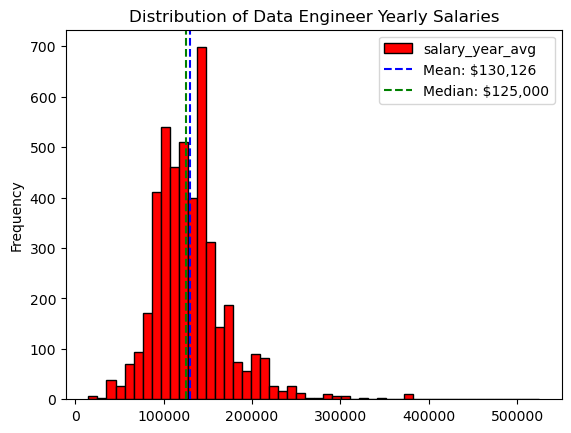

In [14]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])

mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

df_DE['salary_year_avg'].plot(
    kind='hist',
    color='red',
    bins=50,
    edgecolor='black'
)

plt.axvline(
    mean_salary,
    color='blue',
    linestyle='dashed',
    label=f'Mean: ${mean_salary:,.0f}',
)

plt.axvline(
    median_salary,
    color='green',
    linestyle='dashed',
    label=f'Median: ${median_salary:,.0f}',
)

plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()